Saving creditcard.csv to creditcard.csv
 Dataset Loaded Successfully!
Shape: (284807, 31)

 Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

 Fraud Percentage: 0.1727%


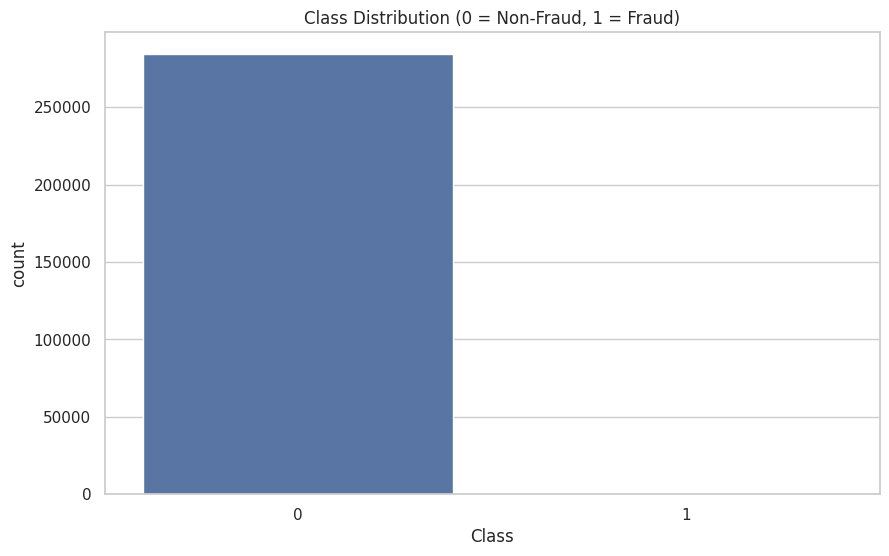

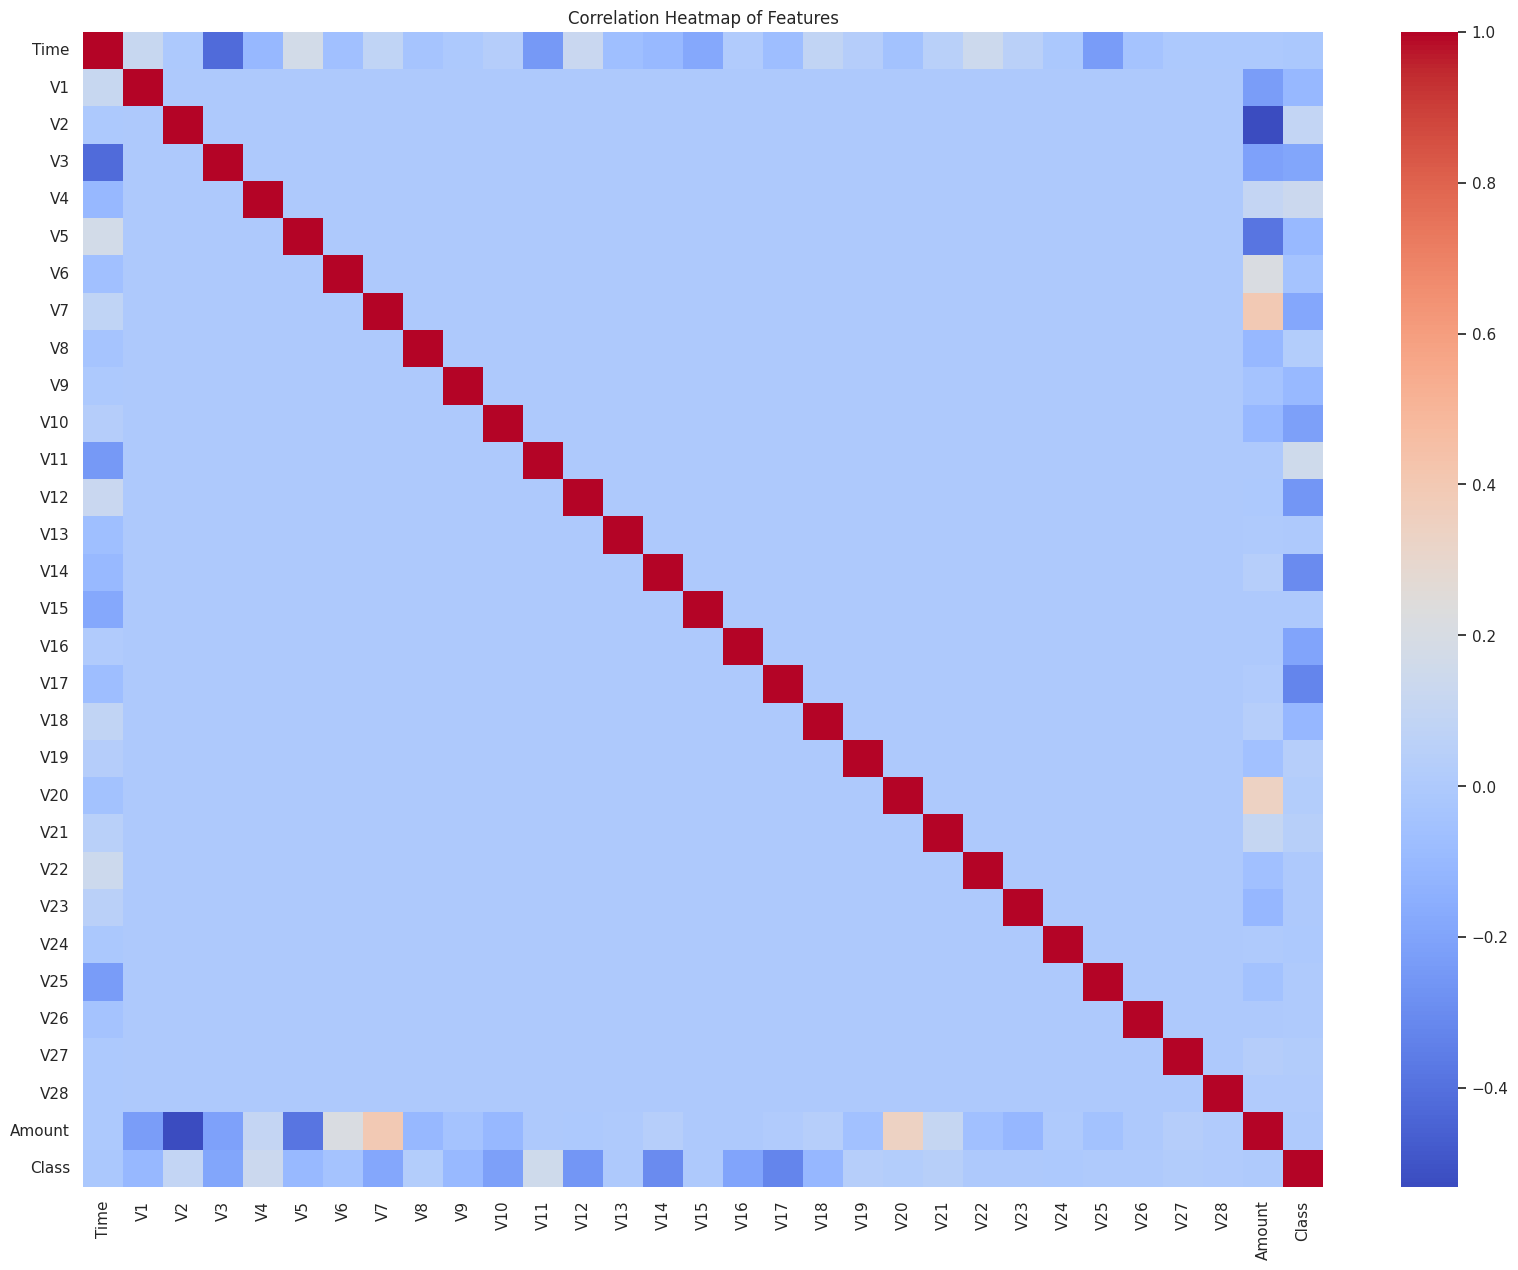

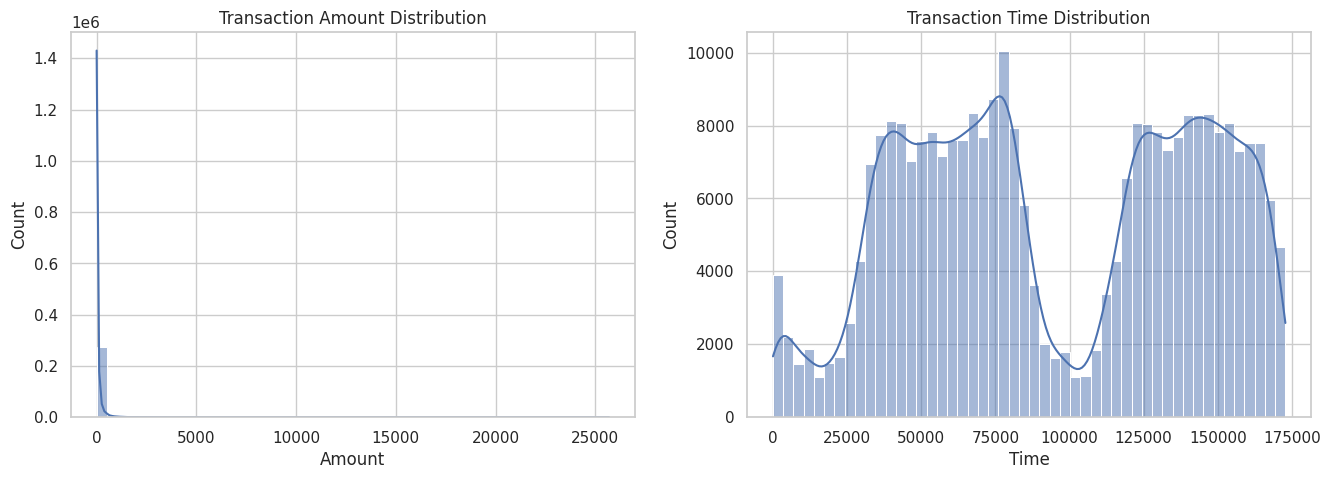

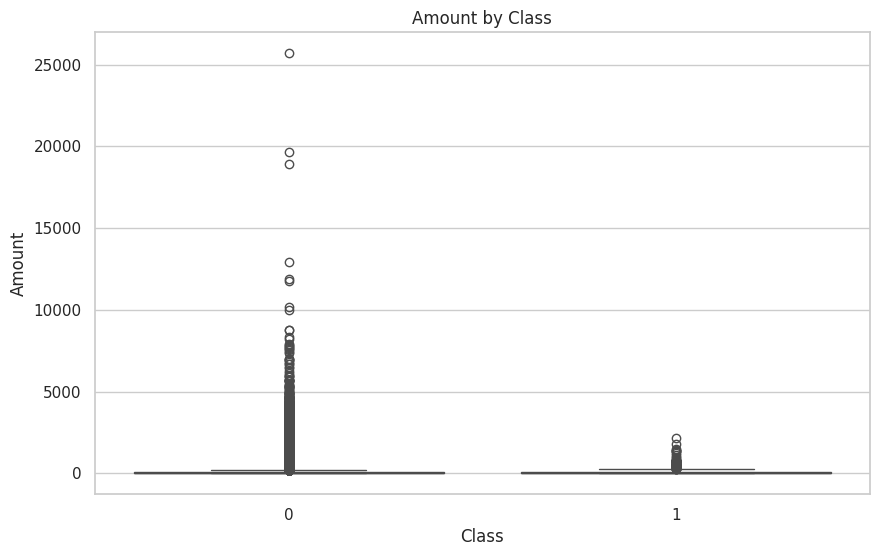

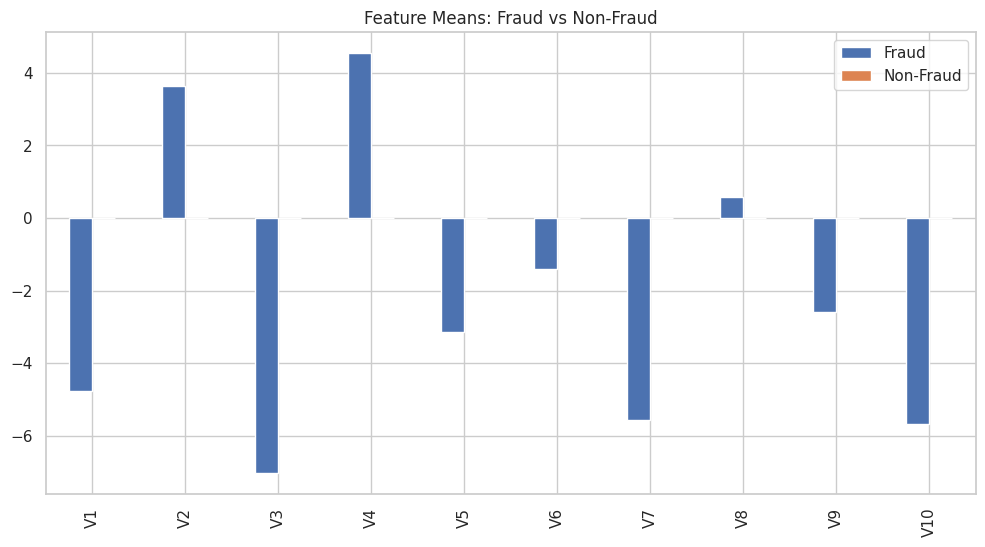

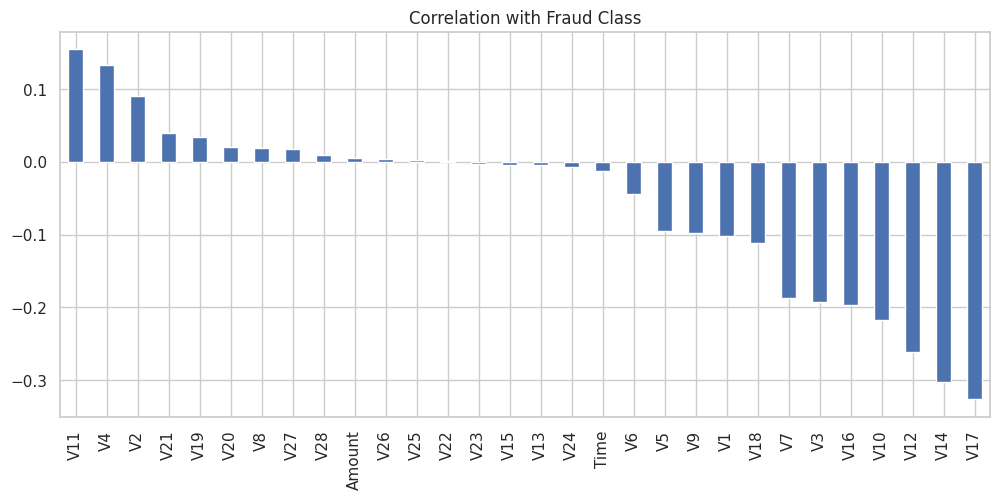

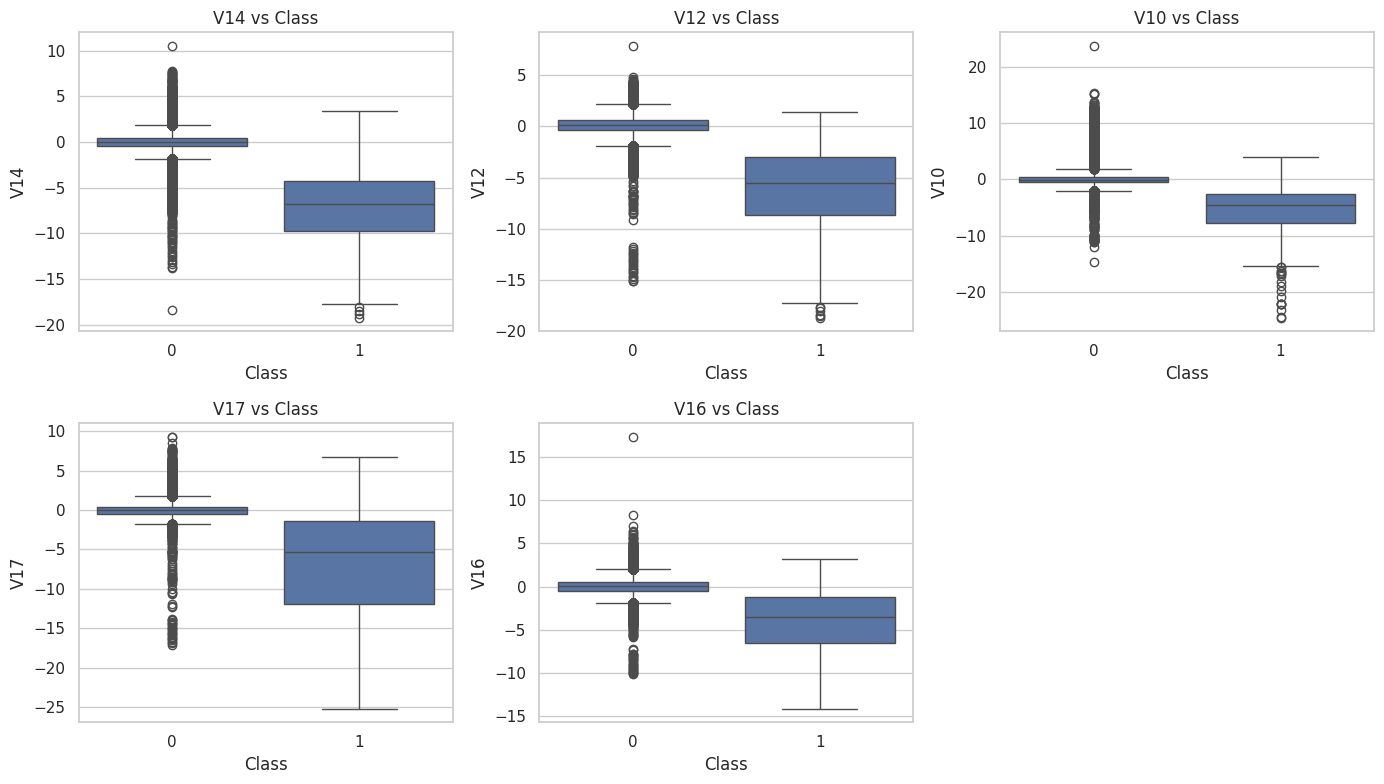


 Starting Logistic Regression Model...

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

 Confusion Matrix:
[[56851    13]
 [   35    63]]
 Accuracy Score: 0.9991573329588147


In [ ]:
# Step 1: Installing  & Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

#  Step 2: Uploading Dataset
uploaded = files.upload()  #  This will open a file picker; select creditcard.csv

#  Step 3: Loading the Data
df = pd.read_csv("creditcard.csv")
print(" Dataset Loaded Successfully!")
print(f"Shape: {df.shape}")
df.head()

#  Step 4: Checking for  Missing Values
print("\n Missing values:\n", df.isnull().sum())

#  Step 5: Checking Class Distribution
print("\n Class Distribution:\n", df['Class'].value_counts())
fraud_pct = df['Class'].value_counts(normalize=True)[1] * 100
print(f"\n Fraud Percentage: {fraud_pct:.4f}%")

sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

#  Step 6: Correlation Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

#  Step 7: Distribution of 'Amount' and 'Time'
fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(df['Amount'], bins=50, ax=axs[0], kde=True)
axs[0].set_title("Transaction Amount Distribution")

sns.histplot(df['Time'], bins=50, ax=axs[1], kde=True)
axs[1].set_title("Transaction Time Distribution")
plt.show()

#  Step 8: Boxplot of Amount vs Class
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount by Class")
plt.show()

#  Step 9: Fraud vs Non-Fraud Mean Values
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

fraud_means = fraud.drop(['Class', 'Time'], axis=1).mean()
non_fraud_means = non_fraud.drop(['Class', 'Time'], axis=1).mean()

comparison_df = pd.DataFrame({'Fraud': fraud_means, 'Non-Fraud': non_fraud_means})
comparison_df[:10].plot(kind='bar', figsize=(12,6), title='Feature Means: Fraud vs Non-Fraud')
plt.show()

#  Step 10: Top Features Correlation with Class
correlations = df.corr()['Class'].drop('Class')
correlations.sort_values(ascending=False).plot(kind='bar', title='Correlation with Fraud Class', figsize=(12,5))
plt.show()

#  Step 11: Outlier Boxplots (Top Correlated Features)
top_features = ['V14', 'V12', 'V10', 'V17', 'V16']

plt.figure(figsize=(14,8))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='Class', y=feature)
    plt.title(f"{feature} vs Class")
plt.tight_layout()
plt.show()

#  Step 12: Optional - Logistic Regression Model
print("\n⚙️ Starting Logistic Regression Model...")

# Select Features & Scale
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
